# Multiple Linear Regression (선형회귀)

## 1. sklearn 모듈 활용

In [4]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

- 참고: http://scikit-learn.org/dev/modules/classes.html#module-sklearn.linear_model

### 1) 1월 온도(A2)와 7월 온도(A3)에 대한 사망률 변화

In [5]:
import urllib2
import json
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'https://raw.githubusercontent.com/bluebibi/LINK_ML_BIG_DATA/master/death_rate.csv'
raw_csv = urllib2.urlopen(path)
df = pd.read_csv(raw_csv)

X = zip(df['A2'], df['A3'])
X[1:5]

[(23, 72), (29, 74), (45, 79), (35, 77)]

In [6]:
regr.fit(X, df['D'])

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

('Coefficients:', array([-0.00083917,  0.00430378]))
('Intercept:', 0.64802157350732881)


In [7]:
# The mean square error
print("Residual sum of squares: %.5f" % np.mean((regr.predict(X) - df['D']) ** 2))

Residual sum of squares: 0.00342


### 2) 선형 회귀식 및 예측

- 선형 회귀식: $y = 0.6480 - 0.0008 * A2 + 0.0043 * A3$ 

In [8]:
test_x = [20, 90]
print regr.predict(test_x)
print 0.6480 - 0.0008 * 20 + 0.0043 * 90

[ 1.01857871]
1.019


### 3) Scatter Plot 및 선형 회귀 Plane 생성

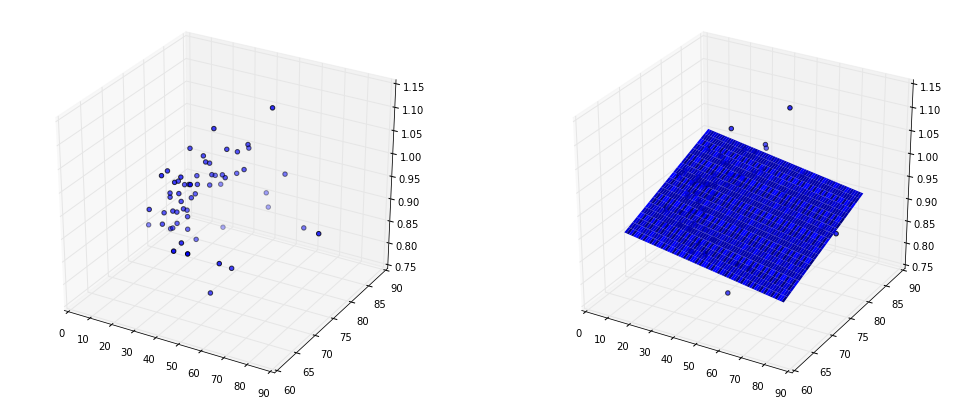

In [9]:
# Plot outputs
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(17, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df['A2'], df['A3'], df['D'])

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df['A2'], df['A3'], df['D'])
# create x,y
xx, yy = np.meshgrid(range(df['A2'].min(), df['A2'].max()), range(df['A3'].min(),df['A3'].max()))
# calculate corresponding z
z = 0.6480 - 0.0008 * xx + 0.0043 * yy
ax2.plot_surface(xx, yy, z, rstride=1, cstride=1, linewidth=0)

In [14]:
np.column_stack?

In [18]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)
print X
print e

[[  0.00000000e+00   0.00000000e+00]
 [  1.01010101e-01   1.02030405e-02]
 [  2.02020202e-01   4.08121620e-02]
 [  3.03030303e-01   9.18273646e-02]
 [  4.04040404e-01   1.63248648e-01]
 [  5.05050505e-01   2.55076013e-01]
 [  6.06060606e-01   3.67309458e-01]
 [  7.07070707e-01   4.99948985e-01]
 [  8.08080808e-01   6.52994592e-01]
 [  9.09090909e-01   8.26446281e-01]
 [  1.01010101e+00   1.02030405e+00]
 [  1.11111111e+00   1.23456790e+00]
 [  1.21212121e+00   1.46923783e+00]
 [  1.31313131e+00   1.72431385e+00]
 [  1.41414141e+00   1.99979594e+00]
 [  1.51515152e+00   2.29568411e+00]
 [  1.61616162e+00   2.61197837e+00]
 [  1.71717172e+00   2.94867871e+00]
 [  1.81818182e+00   3.30578512e+00]
 [  1.91919192e+00   3.68329762e+00]
 [  2.02020202e+00   4.08121620e+00]
 [  2.12121212e+00   4.49954086e+00]
 [  2.22222222e+00   4.93827160e+00]
 [  2.32323232e+00   5.39740843e+00]
 [  2.42424242e+00   5.87695133e+00]
 [  2.52525253e+00   6.37690032e+00]
 [  2.62626263e+00   6.89725538e+00]
 

## 4. Refererence

- http://scikit-learn.org/stable/modules/linear_model.html
- http://radimrehurek.com/data_science_python/
- http://nbviewer.ipython.org/github/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb